In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('customer_churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1899,8563-OYMQY,Male,0,No,No,17,Yes,No,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),90.95,1612.2,No
5647,7502-BNYGS,Female,0,Yes,No,46,Yes,No,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.10,3168,No
118,8402-OOOHJ,Female,0,No,No,41,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.65,835.15,No
6912,2215-ZAFGX,Male,0,No,No,9,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,85.50,791.7,No
1237,2788-CJQAQ,Male,0,No,No,13,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.45,270.2,No


In [3]:
df.drop('customerID',axis='columns',inplace=True)

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [8]:
pd.to_numeric(df.TotalCharges)#there are some space values into it, so if encountered an error,'180 7 instead of 180.7'

ValueError: Unable to parse string " " at position 488

In [ ]:
pd.to_numeric(df.TotalCharges,errors='coerce')#this function will ignore those space values and run the operation and put null into those columns

In [9]:
df['TotalCharges'].isnull().sum()

0

In [10]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df.shape

(7043, 20)

In [12]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [13]:
df.iloc[488]['TotalCharges']#total charges are blank

' '

In [14]:
df=df[df.TotalCharges!=' ']

In [15]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
df.TotalCharges=pd.to_numeric(df.TotalCharges)

In [17]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [18]:
df[(df.Churn=='No')&(df.tenure>20)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
12,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,Male,0,No,No,38,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No


In [19]:
tenure_churn_no=df[df.Churn=='No'].tenure
tenure_churn_yes=df[df.Churn=='Yes'].tenure

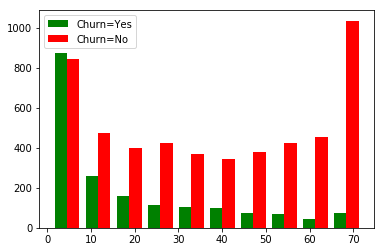

In [20]:
plt.hist(np.array([tenure_churn_yes,tenure_churn_no],dtype=object),color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

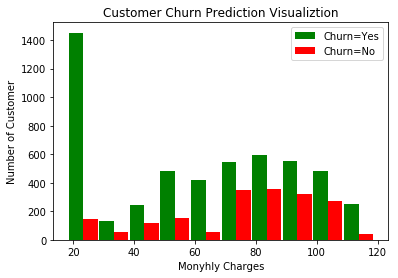

In [21]:
mc_churn_no=df[df.Churn=='No'].MonthlyCharges
mc_churn_yes=df[df.Churn=='Yes'].MonthlyCharges
plt.xlabel('Monyhly Charges')
plt.ylabel('Number of Customer')
plt.title('Customer Churn Prediction Visualiztion')
plt.hist(np.array([mc_churn_no,mc_churn_yes],dtype=object),rwidth=0.95,color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [22]:
def print_unique_col_values(df):
    for columns in df:
        print(f'{columns}:{df[columns].unique()}')

In [23]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [24]:
print_unique_col_values(df)

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:['No' 'Yes']


In [25]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes':1,'No':0},inplace=True)

In [26]:
print_unique_col_values(df)

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [27]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [28]:
df['gender'].unique()

array([1, 0], dtype=int64)

In [29]:
df=pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [30]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [31]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [32]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [33]:
x=df.drop('Churn',axis='columns')
y=df['Churn']

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [35]:
X_train.shape

(5625, 26)

In [36]:
X_test.shape

(1407, 26)

In [37]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [38]:
len(X_train.columns)

26

In [39]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.4846 - accuracy: 0.7595
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4224 - accuracy: 0.7980
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4144 - accuracy: 0.8053
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4117 - accuracy: 0.8025
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4090 - accuracy: 0.8048
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4078 - accuracy: 0.8069
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4071 - accuracy: 0.8119
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4051 - accuracy: 0.8101
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4041 - accuracy: 0.8101
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4028 - accura

176/176 [==============================] - 0s 915us/step - loss: 0.3563 - accuracy: 0.8336
Epoch 81/100
176/176 [==============================] - 0s 921us/step - loss: 0.3576 - accuracy: 0.8327
Epoch 82/100
176/176 [==============================] - 0s 967us/step - loss: 0.3590 - accuracy: 0.8306
Epoch 83/100
176/176 [==============================] - 0s 909us/step - loss: 0.3569 - accuracy: 0.8318
Epoch 84/100
176/176 [==============================] - 0s 927us/step - loss: 0.3567 - accuracy: 0.8327
Epoch 85/100
176/176 [==============================] - 0s 909us/step - loss: 0.3555 - accuracy: 0.8338
Epoch 86/100
176/176 [==============================] - 0s 904us/step - loss: 0.3566 - accuracy: 0.8306
Epoch 87/100
176/176 [==============================] - 0s 904us/step - loss: 0.3548 - accuracy: 0.8327
Epoch 88/100
176/176 [==============================] - 0s 904us/step - loss: 0.3554 - accuracy: 0.8347
Epoch 89/100
176/176 [==============================] - 0s 909us/step - loss:

In [40]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 815us/step - loss: 0.4664 - accuracy: 0.7839


[0.46639397740364075, 0.7839374542236328]

In [41]:
#80% Accuracy
yp=model.predict(X_test)
yp[:5]

array([[0.19496626],
       [0.44275814],
       [0.00924256],
       [0.76612395],
       [0.2182773 ]], dtype=float32)

In [42]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [43]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2660,0,0,0,1,0.169014,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
744,1,0,0,0,0.056338,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
5579,1,0,1,1,0.971831,1,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0
64,1,0,0,0,0.112676,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3287,0,0,1,1,0.253521,1,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,0,0,0,0,0.154930,1,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
4396,0,1,0,0,0.000000,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4081,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1297,1,0,0,0,0.056338,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [44]:
y_pred=[]
for element in yp:
    if element in yp:
        if element>0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)

In [45]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [46]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [47]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       999
           1       0.65      0.54      0.59       408

    accuracy                           0.78      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.78      0.78      1407



Text(69.0, 0.5, 'Truth')

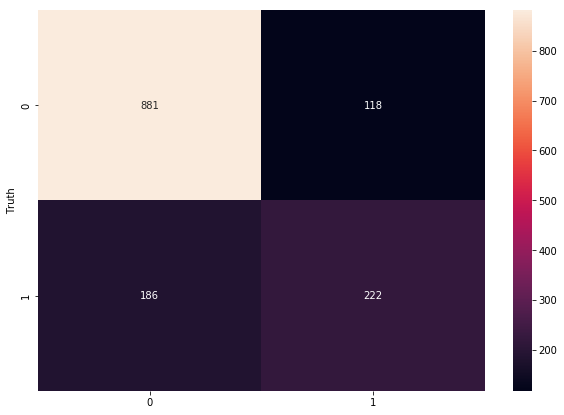

In [48]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.ylabel('Truth')

In [49]:
#accuracy=total Correct prediction/(total prediction)
round((894+190)/(218+105+894+190),2)

0.77

In [50]:
#precision for 0 class=correct prediction for 0/total predction prediction for 0
round(894/(894+218),2)

0.8

In [51]:
round(190/(105+190),2)

0.64

In [52]:
#Recal for =0 coreectly predicted/(total 0 obserbations to predict )
round(894/(894+105),2)

0.89

In [53]:
round(229/(229+179),2)

0.56